In [1]:
%matplotlib inline
import glob
import numpy as np
import numba as nb
import awkward as ak
import awkward1
import matplotlib.pyplot as plt
import uproot
from uproot_methods import TLorentzVectorArray
from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
from cycler import cycler
import coffea.processor as processor
import xgboost

In [2]:
fileset = {'tHq': ['root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/38E83594-51BD-7D46-B96D-620DD60078A7.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/3A3BA22C-AA71-2544-810A-6DF4C6BA96FC.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/3AFB1F42-BC6D-D44E-86FD-DB93C83F88FF.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/A37B4B7A-FB5B-484D-8577-40B860D77D23.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/E3C7548E-EE40-BA45-9130-17DF56FBE537.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/F9EFC559-09E9-BB48-8150-9AA8B7F02C1C.root'],
             'tHW': ['root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/2806293E-D1DD-4A49-A274-0CC3BA57BBDF.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/2F19962E-1DFB-A14A-91C2-30B69D5651D3.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/D9744111-ED04-3F47-A52A-C18424F01609.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/E4CFA095-E7DB-B449-986D-1A5D21FD1D50.root'],
#              'ttW': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/2E92C41D-6F94-F84B-A46B-61EDFFBEFE5B.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/69D60020-75AF-CA42-8D94-99957EEF71DC.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/AB62AEC8-6F15-1947-9E22-0059E196EBE5.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/EA538168-AF02-774C-9648-9BF72471384D.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/2CF42572-162F-F14F-B7CA-96DABCD83589.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/4B8C7791-6DFF-5748-B6AF-7FE0F6B5CA1D.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/5BF4BF41-CFDB-F447-B034-D806DFE3252C.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/794E6532-E576-FB41-A23F-CD078AABC85E.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/8102B971-D215-004C-93EE-AE9A6C1907B3.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/EF9DC33E-137A-0640-976B-8C3AC89F534E.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/FF4BF1D3-A06A-0F44-8458-37984DEA5CAD.root'],
#              'ttWJets': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/028BA117-69BE-B74D-9862-2170CA64B11C.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/1ABC137E-5233-044E-B3FE-8574DC6FC943.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/2274637A-76F8-4049-B651-F60817E6F775.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/2E4A4356-C68F-1B4C-A920-656C7F519328.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/3BEEC74F-9E73-1745-BCA2-09E2725C3979.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/80CEEF63-623A-8144-AEE6-0BAEB5BC314B.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/DA330C53-B0BE-A84F-9308-1BBBC38B095C.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/E3EE47DE-4DBB-FC48-84AB-4F9C26B9CCE8.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/F597371F-E866-6B47-A185-268F927E3372.root'],
#             'ttZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/40000/5B1499CC-2B27-4F44-95BD-7B1C9907ACCD.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/40000/CDA99173-3C05-1A47-AE70-587B44E6348B.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/60000/28C6248C-D55F-8044-BDFB-696BAC0FE329.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/60000/F8A11DF6-4013-6F4C-BBE9-1759933FF20F.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/110000/308939D7-DA54-E949-958D-7B495723DB4C.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/110000/3A1F9F01-E4BC-A347-8D57-8DBFAA890EAB.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/110000/BF1A0533-7A59-A04C-9A6C-6A5EA4697A06.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/191705EA-1891-6942-8CD2-CD70B0E58893.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/27BD2647-8A2F-7C45-964F-F0277A0A011D.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/56608BD3-2A0E-1941-8386-F498EEC16A61.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/7D898E0C-0752-B948-8BA7-7016BD151BD2.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/97637969-BD4B-0640-8158-17722CB9F631.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/9BEAB5BD-5C7E-B54A-B42E-D81FA4B30A2B.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/C7073B6B-C69E-1B42-B378-7FAC8FF4E856.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/FF986F85-71C4-064D-9759-B0C1ACAE9454.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/34275A2F-313A-6D4D-A7EC-DD18BF9C413B.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/392B4635-E8FF-924C-A5B5-51D19C670F69.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/4C139140-A677-AB49-9DF9-5BBF4FA850D2.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/80416EBE-074F-5C4A-AE5F-6403A9F9E9D9.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/96F276D6-1C38-9F4F-93CE-503B860AB550.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/A1AD2099-D5D6-7A47-AEB6-562F68B04441.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/AAD8B507-CEC2-CE44-9B23-822A451F426C.root'],
#             'ttZJets': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/12857BB7-7239-B94A-A890-7CB3C79BD057.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/193EA450-873A-3047-BA69-3B1D1EABB771.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/21167A9A-2FDD-C240-AF27-FAA935B0057C.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/576C9504-E9B2-484C-88DB-1F087D4BA6A3.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/5C781945-9A98-7F44-B397-F806603C9A01.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/69E6121A-F0DC-8043-991A-049199E4BCC4.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/72EF6B33-D0AA-6540-BA4A-A760E8194589.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/8B2D64F4-D873-124B-AE6A-0503FF7A0427.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/B865F28C-D9B3-0944-8E01-D0D3B01C4F26.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/C2C66219-4FAA-4C4E-95FB-CA259749AAA4.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/DD8A6F4F-52CF-9142-B264-B402A94CFD09.root',
#                          'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/E0D9AB84-E0BF-0C49-9B2E-E003587FF335.root'],
#             'ttH': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/05371F7D-77DA-FD4E-BF1F-9C4B6C7B2BF4.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/1097F45B-C2CC-034A-98D5-6A2C38F9E957.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/144E050B-AC6C-5046-B9BF-3CB1045651D1.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/1F8A2052-DD4D-F24B-AEF7-C6C8DB5E42AC.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/2BDDFDC0-1D0E-4141-BCB6-98FDE981E522.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/3D3743BD-A2B7-F34E-BBD3-FE98A055B935.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/70319D0B-46D5-6840-9FA3-49B990C6E117.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/7CF51AAB-6C37-F84E-B091-48C8217EE65E.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/90463B9A-2AB6-1D4E-9D7F-4E6AA6B4500C.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/A922DC1E-905C-0240-81D7-8470159370D4.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/C6BD7A39-4592-F84F-99FB-52C1BBC3F066.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/EE7FEAE7-21B8-4547-A0C7-589B3DDA0704.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/F5A64CA8-059C-4D46-A2C4-9B679A4B911F.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/120000/83CB02F7-FFA9-CD47-9EE6-4D444843595E.root'],
#             'WZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/222071C0-CF04-1E4B-B65E-49D18B91DE8B.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/7EC09E9F-A061-6D46-83DB-E91A8479CD7A.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/9FA39757-C2AB-F34E-A2E8-3D728B605FD1.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/E539344F-0815-064E-BFB2-14D265A460FA.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/0571F847-7582-0D43-A65D-BB1DF150BE77.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/1875117C-8380-0C45-A701-B221443E9010.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/23490416-1F0E-364F-B5D9-7F7C92360277.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/423A6069-CE53-A94F-8D9F-75342F9F9273.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/42816FAA-2580-7146-93BE-C9482FC56E5F.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/4DCA8EC5-BC5C-3447-8A91-C21142F57775.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/4F6290B2-15A7-C840-8544-26FBA7D62129.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/62527AE1-E838-BF44-AA33-C145C74F2196.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/64F0D9CB-C675-3F49-ACE2-E06CD5CFFA13.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/669C5D12-E263-0E41-9F49-B277198FA882.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/788641E9-D641-0F40-AC0D-69E335F7E04D.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/A2DCB4B2-9A3B-6049-B845-8BC13C623736.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/B5189B28-6A9D-9240-A943-830C76F1C4CE.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/CFBDFA7E-FA6A-9E40-976A-5E2CAE843CE2.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/D52DFC49-0016-2941-BEB6-7958728B782E.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/DD34D24C-D3E4-6046-AA01-EDF356AC83CB.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/E4035DC3-ACD2-0440-805F-F8C46406E0A0.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/FED349E0-72BB-7E4F-B776-F9BB8C278B27.root'],
#             'ZZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/010B000A-0883-064B-B250-A6159DB2603A.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/1B4E5034-DD6A-DB40-882D-20B5C42A9722.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/462F4643-6F37-EA42-8F6C-90B91C23A731.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/465A6EA9-E768-E642-8A73-B27E21BD3595.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/46E99F08-CB4C-914F-9CF0-1A9E7DCE8081.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/73D0D73F-E72D-E649-8772-2BECC3D296D7.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/773BDDB0-D100-DA4B-8522-17EB71265BEE.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/D08D925B-BA30-3642-9995-F165FC2542D7.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/DC582D74-81EF-504C-8342-08D42BB17C38.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/FD274208-7DF0-3245-945F-87B17415142E.root'],
#             'ZZZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ZZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/37FA68CC-B841-7D41-994C-645CFA4BA227.root'],
#             'WWZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WWZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/8034D852-4E18-F441-B1B7-3A4BA82B8963.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WWZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/EE791322-C349-A14A-B49A-75BDAA03482E.root'],
#             'WZZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/4359B067-2773-4D48-A235-CD33C3A20AD9.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/50D0F171-4A01-644A-A1D9-6BF1D915DF2A.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/61EDBB45-0A24-1847-9FD6-222D7D8D6AF3.root'],
#             'tttt': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTTT_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/E23424C4-B553-114D-A9F2-9E2F21D641F6.root',
#                      'root://xcache//store/mc/RunIISummer16NanoAODv5/TTTT_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/ED3B459F-A945-C847-9B80-B847C3487049.root'],
#             'WpWp': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WpWpJJ_EWK-QCD_TuneCUETP8M1_13TeV-madgraph-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/025F6345-BE37-DF45-B582-25EA8300B4E8.root'],
          }

In [3]:
from itertools import combinations

# This is a helper function which adds muon (0) and electron (1) identifiers to a stacked lepton JaggedArray.
def make_labeled_p4(x, indices, itype):
    p4 = TLorentzVectorArray.from_ptetaphim(x.pt, x.eta, x.phi, x.mass)
    return ak.JaggedArray.zip(p4=p4,
                              ptype=itype*x.pt.ones_like().astype(np.int),
                              pidx=indices,
                              charge=x.charge)

# This generates a stacked lepton JaggedArray, allowing combination of both muons and electrons for computations across flavor.
def stack_leptons(muons, electrons):
    # Construct new lepton indices within every event array.
    muons_indices = ak.JaggedArray.fromoffsets(muons.pt.offsets, 
                                             np.arange(0, muons.pt.content.size)) - muons.pt.offsets[:-1]
    electrons_indices = ak.JaggedArray.fromoffsets(electrons.pt.offsets, 
                                             np.arange(0, electrons.pt.content.size)) - electrons.pt.offsets[:-1]
    # Assign 0/1 value depending on whether lepton is muon/electron.
    muons_p4 = make_labeled_p4(muons, muons_indices, 0)
    electrons_p4 = make_labeled_p4(electrons, electrons_indices, 1)
    # Concatenate leptons.
    stacked_p4 = ak.concatenate((muons_p4, electrons_p4), axis=1)
    
    return stacked_p4

# Helper function which takes a pair, tells you if it is an OSSF with |m_ll - m_z| < 15. Reject these events.
def ossf_zmass_check(dileptons):
    return ((dileptons.i0.charge != dileptons.i1.charge) & 
            (np.abs(91.18 - (dileptons.i0 + dileptons.i1).mass) < 15.)).any()

In [4]:
def discriminators(leptons, jets, loose_wp, medium_wp):
    # Construct light and bjets for easier manipulation.
    loose_jets = jets[(jets.btagCSVV2 < loose_wp)]
    nonloose_jets = jets[(jets.btagCSVV2 > loose_wp)]
    
    # lll data selection
    # Our goal is to construct jagged arrays which each have 1 element per event. None are empty by event selection.
    nJet25 = jets[(jets.pt > 25) & (np.abs(jets.eta) < 2.4)]
    
    MaxEtaJet25 = nonloose_jets[nonloose_jets.pt > 25]
    MaxEtaJet25 = MaxEtaJet25.eta[MaxEtaJet25.eta.argmax()]
    
    totCharge = leptons.charge.sum()
    
    nJetEta1 = nonloose_jets[np.abs(nonloose_jets.eta) > 1.0].counts
    
    fwdLightJet = loose_jets[loose_jets.eta.argmax()]
    hardestLooseJet = loose_jets[loose_jets.pt.argmax()]
    detaFwdJetBjet = np.abs(fwdLightJet.eta - hardestLooseJet.eta)
    
    nexthardestLooseJet = loose_jets[~loose_jets.pt.argmax()]
    nexthardestLooseJet = nexthardestLooseJet[nexthardestLooseJet.pt.argmax()]
    detaFwdJet2Bjet = np.abs(fwdLightJet.eta - nexthardestLooseJet.eta)
    
    crossLepJet = leptons.cross(fwdLightJet)
    crossLepJetdR = crossLepJet.i0.p4.delta_r(crossLepJet.i1)
    nearestLepton = leptons[crossLepJetdR.argmin()]
    detaFwdJetClosestLep = np.abs(fwdLightJet.eta - nearestLepton.p4.eta)
    
    pairs = leptons.choose(2)
    pairs = pairs[pairs.i0.charge == pairs.i1.charge]
    hardestPairs = pairs[(pairs.i0.p4.mass + pairs.i1.p4.mass).argmax()]
    dphiHighestPtSSPair = np.abs(hardestPairs.i0.p4.phi - hardestPairs.i1.p4.phi)
    
    DR = pairs.i0.p4.delta_r(pairs.i1.p4)
    minDRll = DR[DR.argmin()]
    
    LepLastPt = leptons.p4.pt[leptons.p4.pt.argmin()]
    
    return nJet25, MaxEtaJet25, totCharge, nJetEta1, detaFwdJetBjet, detaFwdJet2Bjet, detaFwdJetClosestLep, dphiHighestPtSSPair, minDRll, LepLastPt

In [5]:
class SignalProcessor(processor.ProcessorABC):
    def __init__(self):
        dataset_axis = hist.Cat("dataset", "")
        lll_Lep3Pt_axis = hist.Bin("lll_Lep3Pt", "3rd Lepton $p_T$ [GeV]", 18, 0, 90)
        lll_detaFwdJetBJet_axis = hist.Bin("lll_detaFwdJetBJet", "$\Delta \eta$ max fwd jet and leading bjet", 18, 0, 6)
        lll_detaFwdJet2BJet_axis = hist.Bin("lll_detaFwdJet2BJet", "$\Delta \eta$ max fwd jet and sub-leading bjet", 18, 0, 6)
        lll_detaFwdJetClosestLep_axis = hist.Bin("lll_detaFwdJetClosestLep", "$\Delta \eta$ max fwd jet and closest lepton", 18, 0, 6)
        lll_dphiHighestPtSSPair_axis = hist.Bin("lll_dphiHighestPtSSPair", "$\Delta \Phi$ highest $p_T$ same-sign lepton pair", 18, 0, 3.5)
        lll_MaxEtaJet25_axis = hist.Bin("lll_MaxEtaJet25", "max jet $|\eta|$ ($p_T$ > 25)", 18, 0, 5)
        lll_minDRll_axis = hist.Bin("lll_minDRll", "Minimum $\Delta$ R between any two leptons", 18, 0, 4)
        lll_nJet25_axis = hist.Bin("lll_nJet25", "N(jet, $p_T$ > 25, $|\eta|$ < 2.4)", 6, 2, 8)
        lll_nJetEta1_axis = hist.Bin("lll_nJetEta1", "N(jet, $|\eta|$ > 1) non CSV medium", 7, 1, 8)        
        lll_totCharge_axis = hist.Bin("lll_totCharge", "Total Lepton Charge", 5, -2, 3)
        
        ll_Lep2Pt_axis = hist.Bin("ll_Lep2Pt", "Sub-leading Lepton $p_T$ [GeV]", 18, 0, 144)
        ll_detaFwdJetBJet_axis = hist.Bin("ll_detaFwdJetBJet", "$\Delta \eta$ max fwd jet and leading bjet", 18, 0, 6)
        ll_detaFwdJet2BJet_axis = hist.Bin("ll_detaFwdJet2BJet", "$\Delta \eta$ max fwd jet and sub-leading bjet", 18, 0, 6)
        ll_detaFwdJetClosestLep_axis = hist.Bin("ll_detaFwdJetClosestLep", "$\Delta \eta$ max fwd jet and closest lepton", 18, 0, 6)
        ll_dphiHighestPtSSPair_axis = hist.Bin("ll_dphiHighestPtSSPair", "$\Delta \Phi$ highest $p_T$ same-sign lepton pair", 18, 0, 3.5)
        ll_MaxEtaJet25_axis = hist.Bin("ll_MaxEtaJet25", "max jet $|\eta|$ ($p_T$ > 40)", 18, 0, 5)
        ll_minDRll_axis = hist.Bin("ll_minDRll", "Minimum $\Delta$ R between any two leptons", 18, 0, 4)
        ll_nJet25_axis = hist.Bin("ll_nJet25", "N(jet, $p_T$ > 25, $|\eta|$ < 2.4)", 6, 2, 8)
        ll_nJetEta1_axis = hist.Bin("ll_nJetEta1", "N(jet, $|\eta|$ > 1) non CSV medium", 7, 1, 8)        
        ll_totCharge_axis = hist.Bin("ll_totCharge", "Total Lepton Charge", 5, -2, 3)
        
        self._accumulator = processor.dict_accumulator({
            'lll_Lep3Pt': hist.Hist("Events", dataset_axis, lll_Lep3Pt_axis),
            'lll_detaFwdJetBJet': hist.Hist("Events", dataset_axis, lll_detaFwdJetBJet_axis),
            'lll_detaFwdJet2BJet': hist.Hist("Events", dataset_axis, lll_detaFwdJet2BJet_axis),
            'lll_detaFwdJetClosestLep': hist.Hist("Events", dataset_axis, lll_detaFwdJetClosestLep_axis),
            'lll_dphiHighestPtSSPair': hist.Hist("Events", dataset_axis, lll_dphiHighestPtSSPair_axis),
            'lll_MaxEtaJet25': hist.Hist("Events", dataset_axis, lll_MaxEtaJet25_axis),
            'lll_minDRll': hist.Hist("Events", dataset_axis, lll_minDRll_axis),
            'lll_nJet25': hist.Hist("Events", dataset_axis, lll_nJet25_axis),
            'lll_nJetEta1': hist.Hist("Events", dataset_axis, lll_nJetEta1_axis),
            'lll_totCharge': hist.Hist("Events", dataset_axis, lll_totCharge_axis),
            'll_Lep2Pt': hist.Hist("Events", dataset_axis, ll_Lep2Pt_axis),
            'll_detaFwdJetBJet': hist.Hist("Events", dataset_axis, ll_detaFwdJetBJet_axis),
            'll_detaFwdJet2BJet': hist.Hist("Events", dataset_axis, ll_detaFwdJet2BJet_axis),
            'll_detaFwdJetClosestLep': hist.Hist("Events", dataset_axis, ll_detaFwdJetClosestLep_axis),
            'll_dphiHighestPtSSPair': hist.Hist("Events", dataset_axis, ll_dphiHighestPtSSPair_axis),
            'll_MaxEtaJet25': hist.Hist("Events", dataset_axis, ll_MaxEtaJet25_axis),
            'll_minDRll': hist.Hist("Events", dataset_axis, ll_minDRll_axis),
            'll_nJet25': hist.Hist("Events", dataset_axis, ll_nJet25_axis),
            'll_nJetEta1': hist.Hist("Events", dataset_axis, ll_nJetEta1_axis),
            'll_totCharge': hist.Hist("Events", dataset_axis, ll_totCharge_axis),
            'cutflow': processor.defaultdict_accumulator(int)
        })
    
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, events):
        output = self.accumulator.identity()
        
        # btag working point numbers, for easy reference.
        loose_wp = 0.5425
        medium_wp = 0.8484

        # Initialize relevant event columns.
        dataset = events.metadata["dataset"]
        jets = events.Jet
        muons = events.Muon
        electrons = events.Electron

        # This is bookkeeping that tracks how many total events there are.
        output['cutflow']['all events'] += events.size
        
        
        
        # # # # # # # # # # #
        # LEPTON SELECTIONS #
        # # # # # # # # # # #
        
        # Don't want any jets below 25 pT. Remove them now instead of later.
        jets = jets[(jets.pt > 25)]
        
        # Here we establish the loose muons array, based on provided cuts.
        loose_muons = muons[(np.abs(muons.eta) < 2.4) &
                      (np.abs(muons.dxy) < 0.05) & 
                      (np.abs(muons.dz) < 0.1) & 
                      (muons.sip3d < 8) &
                      (muons.miniPFRelIso_all < 0.4) &
                      (muons.looseId) &
                      (muons.pt > 5)]
        
        # Tight is loose with additional cuts; build tight array and add cuts.
        tight_muons = loose_muons[(loose_muons.tightCharge > 0) &
                                  (loose_muons.mediumId) &
                                  (loose_muons.mvaTTH > 0.9)]

        # This ends up getting referenced a lot. Let's not generate it every time!
        abs_eta = np.abs(electrons.eta)
        
        # Here we establish the loose electrons array, based on provided cuts.
        loose_electrons = electrons[(abs_eta < 2.5) & 
                              (np.abs(electrons.dxy) < 0.05) & 
                              (np.abs(electrons.dz) < 0.1) & 
                              (electrons.lostHits < 2) &
                              (electrons.miniPFRelIso_all < 0.4) &
                              (electrons.pt > 7) &
                              (((electrons.mvaFall17V2noIso > 0) & (abs_eta < 1.479)) | ((electrons.mvaFall17V2noIso > 0.7) & (abs_eta > 1.479) & (abs_eta < 2.5)))]
            
        # Now we build tight from loose, adding in tight's extra cuts.
        # Redefine abs_eta since we're now using loose.
        abs_eta = np.abs(loose_electrons.eta)
        
        tight_electrons = loose_electrons[(loose_electrons.pt > 15) &
                                         (loose_electrons.lostHits == 0) &
                                         (loose_electrons.tightCharge > 0) &
                                         (loose_electrons.convVeto) &
                                         (loose_electrons.mvaTTH > 0.90) &
                                         # Two ranges for sigma_ieie.
                                         (((abs_eta < 1.479) & (loose_electrons.sieie < 0.011)) | 
                                         ((abs_eta < 2.5) & (abs_eta > 1.479) & (loose_electrons.sieie < 0.03))) &
                                         # Two ranges for H/E
                                         (((abs_eta < 1.479) & (loose_electrons.hoe < 0.1)) | 
                                         ((abs_eta < 2.5) & (abs_eta > 1.479) & (loose_electrons.hoe < 0.07))) &
                                         # Two ranges for 1/E - 1/p
                                         (((abs_eta < 1.479) & (loose_electrons.eInvMinusPInv < 0.01) & (loose_electrons.eInvMinusPInv > -0.05)) |
                                         ((abs_eta < 2.5) & (abs_eta > 1.479) & (loose_electrons.eInvMinusPInv < 0.005) & (loose_electrons.eInvMinusPInv > -0.05)))]        
        
        

        # # # # # # # # # #
        # EVENT SELECTION #
        # # # # # # # # # #
        
        # Loose pre-selection. See definition of stack_leptons above to see how we construct arrays across leptons.
        loose_leptons = stack_leptons(loose_muons, loose_electrons)
        loose_pairs = loose_leptons.argchoose(2)
        loose_pairs_mass = (loose_leptons[loose_pairs.i0].p4 + loose_leptons[loose_pairs.i1].p4).mass
        looseMask = ((loose_pairs_mass >= 12).all() & (loose_pairs_mass.counts > 0))
        
        # Dilepton selection.
        tight_leptons = stack_leptons(tight_muons, tight_electrons)
        tight_pairs = tight_leptons.argchoose(2)
        # Add types to see what kind of pair we have. mu = 0, e = 1, so: mumu = 0, emu = 1, ee = 2.
        tight_types = (tight_leptons[tight_pairs.i0].ptype + tight_leptons[tight_pairs.i1].ptype)
        
        # Respectively; each event should have exactly 1 pair (2 leptons) with same charge
        #               one should have pT > 25 (pT > 15 is guaranteed by lepton selection)
        #               for ee events, check that mass from Z is < 10 to veto possible Z bosons.
        dileptonMask = ((tight_pairs.counts == 1) & (tight_leptons[tight_pairs.i0].charge == tight_leptons[tight_pairs.i1].charge).any()) & ((tight_leptons[tight_pairs.i0].p4.pt > 25) | (tight_leptons[tight_pairs.i1].p4.pt > 25)).any() & ((tight_types < 2) | (np.abs((tight_leptons[tight_pairs.i0].p4 + tight_leptons[tight_pairs.i1].p4).mass - 91.18) > 10)).any()
        
        # Trilepton selection.
        tight_triples = tight_leptons.argchoose(3)
        tight_muon_pairs = tight_muons.choose(2)
        tight_electron_pairs = tight_electrons.choose(2)
        
        # Respectively; we want events with exactly three tight leptons (one triple),
        #               one should have pT > 25, discard if OSSF dileptons are close to the Z mass.
        trileptonMask = (tight_triples.counts == 1) & ((tight_leptons[tight_triples.i0].p4.pt > 25) | (tight_leptons[tight_triples.i1].p4.pt > 25) | (tight_leptons[tight_triples.i2].p4.pt > 25)).any() & (~ossf_zmass_check(tight_muon_pairs)) & (~ossf_zmass_check(tight_electron_pairs))
        
        # Jet masks can be generated much more simply, since we're staying in one collection.
        jetMask_medium = ((np.abs(jets.eta) < 2.4) & (jets.btagCSVV2 > medium_wp)).sum() >= 1
        jetMask_loose = (((np.abs(jets.eta) < 2.4) | ((jets.pt > 40) & (np.abs(jets.eta) > 2.4))) & (jets.btagCSVV2 <= loose_wp)).sum() >= 1
        
        # May as well combine all of our masks into one (well, two) big one(s) for easier referencing.
        # Split dileptons and trileptons into separate channels, because it's easier to work with later.
        dilepton_eventMask = (looseMask) & (dileptonMask) & (jetMask_medium) & (jetMask_loose)
        trilepton_eventMask = (looseMask) & (trileptonMask) & (jetMask_medium) & (jetMask_loose)
                
            
        # ** Should be able to generalize this to ll_channel, lll_channel, and use NanoEvents at event level
        # when awkward1 is implemented into Coffea! That'll be much simpler :)
        # Also cannot use something general like muons/electrons/jets for similar reasons.
        leptons = stack_leptons(muons, electrons)
        ll_leptons = leptons[dilepton_eventMask]
        ll_jets = jets[dilepton_eventMask]
        lll_leptons = leptons[trilepton_eventMask]
        lll_jets = jets[trilepton_eventMask]
 
        (ll_nJet25, ll_MaxEtaJet25, ll_totCharge, ll_nJetEta1, 
         ll_detaFwdJetBjet, ll_detaFwdJet2Bjet, ll_detaFwdJetClosestLep, 
         ll_dphiHighestPtSSPair, ll_minDRll, ll_Lep2Pt) = discriminators(ll_leptons, ll_jets, loose_wp, medium_wp)

        (lll_nJet25, lll_MaxEtaJet25, lll_totCharge, lll_nJetEta1, 
         lll_detaFwdJetBjet, lll_detaFwdJet2Bjet, lll_detaFwdJetClosestLep, 
         lll_dphiHighestPtSSPair, lll_minDRll, lll_Lep3Pt) = discriminators(lll_leptons, lll_jets, loose_wp, medium_wp)        
        
        # # # # # 
        # HISTS #
        # # # # #
        
        output['lll_Lep3Pt'].fill(dataset=dataset, lll_Lep3Pt=lll_Lep3Pt.flatten())
#         output['lll_detaFwdJetBJet'].fill(dataset=dataset, lll_detaFwdJetBJet=lll_detaFwdJetBJet.flatten())
#         output['lll_detaFwdJet2BJet'].fill(dataset=dataset, lll_detaFwdJet2BJet=lll_detaFwdJet2BJet.flatten())
        output['lll_detaFwdJetClosestLep'].fill(dataset=dataset, lll_detaFwdJetClosestLep=lll_detaFwdJetClosestLep.flatten())
        output['lll_dphiHighestPtSSPair'].fill(dataset=dataset, lll_dphiHighestPtSSPair=lll_dphiHighestPtSSPair.flatten())
        output['lll_MaxEtaJet25'].fill(dataset=dataset, lll_MaxEtaJet25=lll_MaxEtaJet25.flatten())
        output['lll_minDRll'].fill(dataset=dataset, lll_minDRll=lll_minDRll.flatten())
#        output['lll_nJet25'].fill(dataset=dataset, lll_nJet25=lll_nJet25.flatten()) # bin indices?
        output['lll_nJetEta1'].fill(dataset=dataset, lll_nJetEta1=lll_nJetEta1.flatten())
        output['lll_totCharge'].fill(dataset=dataset, lll_totCharge=lll_totCharge.flatten())
        
        output['ll_Lep2Pt'].fill(dataset=dataset, ll_Lep2Pt=ll_Lep2Pt.flatten())
#         output['ll_detaFwdJetBJet'].fill(dataset=dataset, ll_detaFwdJetBJet=ll_detaFwdJetBJet.flatten())
#         output['ll_detaFwdJet2BJet'].fill(dataset=dataset, ll_detaFwdJet2BJet=ll_detaFwdJet2BJet.flatten())
        output['ll_detaFwdJetClosestLep'].fill(dataset=dataset, ll_detaFwdJetClosestLep=ll_detaFwdJetClosestLep.flatten())
        output['ll_dphiHighestPtSSPair'].fill(dataset=dataset, ll_dphiHighestPtSSPair=ll_dphiHighestPtSSPair.flatten())
        output['ll_MaxEtaJet25'].fill(dataset=dataset, ll_MaxEtaJet25=ll_MaxEtaJet25.flatten())
        output['ll_minDRll'].fill(dataset=dataset, ll_minDRll=ll_minDRll.flatten())
#         output['ll_nJet25'].fill(dataset=dataset, ll_nJet25=ll_nJet25.flatten())
        output['ll_nJetEta1'].fill(dataset=dataset, ll_nJetEta1=ll_nJetEta1.flatten())
        output['ll_totCharge'].fill(dataset=dataset, ll_totCharge=ll_totCharge.flatten())
        
        # # # # # #
        # BDT GEN #
        # # # # # #
        
#         if dataset=='THQ':
#             lll_signal_events = events[trilepton_eventMask]
#             lll_signal_train = signal_events[np.random.randint(low=0, high=2, size=signal_events.size)]
#             ll_signal_events = events[dilepton_eventMask]
#             ll_signal_train = signal_events[np.random.randint(low=0, high=2, size=signal_events.size)]
#         elif (dataset=='ttW' or dataset=='ttWJets' or dataset=='ttZ' or dataset=='ttZJets'):
#             lll_background_events = events[trilepton_eventMask]
#             lll_background_train = background_events[np.random.randint(low=0, high=2, size=background_events.size)]
#             ll_background_events = events[dilepton_eventMask]
#             ll_background_train = signal_events[np.random.randint(low=0, high=2, size=signal_events.size)]
        
        
        return output

    def postprocess(self, accumulator):
        return accumulator

In [6]:
from dask.distributed import Client
from coffea_casa import CoffeaCasaCluster

# cluster = CoffeaCasaCluster()
# cluster.adapt(minimum=4, maximum=16)
# client = Client(cluster)

# output = processor.run_uproot_job(fileset=fileset, 
#                        treename="Events", 
#                        processor_instance=SignalProcessor(),
#                        executor=processor.dask_executor,
#                        executor_args={'client': client},
#                        chunksize=250000)

output = processor.run_uproot_job(fileset=fileset, 
                       treename="Events", 
                       processor_instance=SignalProcessor(),
                       executor=processor.futures_executor,
                       executor_args={'workers': 8, 'nano': True},
                       chunksize=250000)

/opt/conda/lib/python3.8/site-packages/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/opt/conda/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.8/site-packages/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/opt/conda/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
colors = ['#99CC66', '#669966', '#CC6600', '#FF3300', '#FF9966', '#CC66FF', '#FFCC00', '#000000']


stack = True
clear = False
fill_opts = None
overlay = 'dataset'

Three Lepton Channel


AssertionError: len along main axis of h has to be smaller by 1 than len of bins

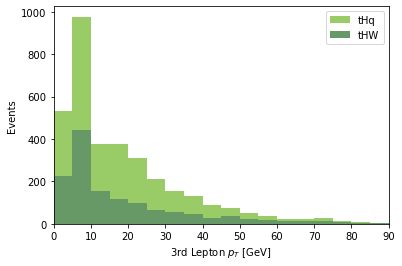

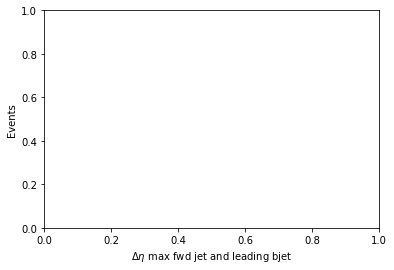

In [8]:
print('Three Lepton Channel')
for key in output.keys():
    if key.startswith('lll_'):
        fig, ax = plt.subplots(1)
        ax.set_prop_cycle(cycler(color=colors))
        hist.plot1d(output[key], overlay=overlay, stack=stack, ax=ax, clear=clear, fill_opts=fill_opts)

In [ ]:
print('Two SS Lepton Channel')
for key in output.keys():
    if key.startswith('ll_'):
        fig, ax = plt.subplots(1)
        ax.set_prop_cycle(cycler(color=colors))
        hist.plot1d(output[key], overlay=overlay, stack=stack, ax=ax, clear=clear, fill_opts=fill_opts)

In [ ]:
for key, value in output['cutflow'].items():
    print(key, value)

In [ ]:
test = np.array([1, 2, 3])

In [ ]:
output['lll_Lep3Pt'].fill(dataset='test', lll_Lep3Pt = test)

In [ ]:
hist.plot1d(output['lll_Lep3Pt'])